In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,address_id,city,postal_code,census_tract,standardstatus,mlsstatus,contractstatuschangedate,purchasecontractdate,closedate,listingcontractdate,daysonmarket,closeprice,listprice,originallistprice,propertytype,propertysubtype,lotsizearea,lotsizeunits,lotfeatures,totalactualrent,bedroomstotal,bathroomstotalinteger,bathroomsfull,bathroomshalf,livingarea,livingareaunits,garageyn,parkingfeatures,stories,yearbuilt,newconstructionyn,heating,cooling,architecturalstyle
0,3529,San Antonio,78253.0,172005.0,Closed,Sold,2022-01-26,2021-12-23,2022-01-18,2021-12-09,25.0,272000.0,279900,279900.0,Residential,Single Family Detached,0.140,Acres,NaN,NaN,3.0,2.0,2.0,0.0,1418.0,Square Feet,1.0,Two Car Garage,1.0,2007.0,0.0,"Central,Natural Gas",One Central,One Story
1,106247,San Antonio,78250.0,181731.0,Active,New,2022-07-01,NaN,NaN,2022-07-01,1.0,NaN,2850,2850.0,Residential Rental,Single Family Residence Detached,0.170,Acres,NaN,2850.0,4.0,3.0,2.0,1.0,3288.0,Square Feet,1.0,"Two Car Garage,Attached",NaN,1997.0,0.0,"Central,Electric",One Central,Two Story
2,217187,San Antonio,78251.0,171912.0,Closed,Sold,2022-01-27,2021-12-30,2022-01-25,2021-12-29,9.0,250300.0,249900,249900.0,Residential,Single Family Detached,0.140,Acres,NaN,NaN,3.0,2.0,2.0,0.0,1614.0,Square Feet,1.0,"Two Car Garage,Attached",1.0,2006.0,0.0,"Central,Electric",One Central,"One Story,Traditional"
3,241534,San Antonio,78253.0,172005.0,Closed,Sold,2022-01-31,2021-12-22,2022-01-21,2021-12-09,21.0,310000.0,310000,310000.0,Residential,Single Family Detached,0.119,Acres,Level,NaN,4.0,2.0,2.0,0.0,1732.0,Square Feet,1.0,Two Car Garage,1.0,2012.0,0.0,"Central,Natural Gas",One Central,"One Story,Traditional"
4,267606,San Antonio,78254.0,181728.0,Closed,Sold,2021-07-29,2021-06-23,2021-07-28,2021-07-20,8.0,280000.0,268000,268000.0,Residential,Single Family Detached,0.110,Acres,NaN,NaN,4.0,3.0,2.0,1.0,2278.0,Square Feet,1.0,One Car Garage,2.0,2006.0,0.0,"Central,Electric",One Central,Traditional


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address_id                4780 non-null   int64  
 1   city                      4778 non-null   object 
 2   postal_code               4778 non-null   float64
 3   census_tract              4778 non-null   float64
 4   standardstatus            4780 non-null   object 
 5   mlsstatus                 4780 non-null   object 
 6   contractstatuschangedate  4780 non-null   object 
 7   purchasecontractdate      3922 non-null   object 
 8   closedate                 3508 non-null   object 
 9   listingcontractdate       4780 non-null   object 
 10  daysonmarket              4779 non-null   float64
 11  closeprice                3508 non-null   float64
 12  listprice                 4780 non-null   int64  
 13  originallistprice         4765 non-null   float64
 14  property

In [5]:
df.nunique()

address_id                  4300
city                           2
postal_code                    5
census_tract                  20
standardstatus                 6
mlsstatus                     14
contractstatuschangedate     381
purchasecontractdate         400
closedate                    349
listingcontractdate          395
daysonmarket                 187
closeprice                   989
listprice                   1330
originallistprice           1413
propertytype                   5
propertysubtype               17
lotsizearea                   74
lotsizeunits                   1
lotfeatures                  148
totalactualrent              180
bedroomstotal                  6
bathroomstotalinteger          7
bathroomsfull                  5
bathroomshalf                  5
livingarea                  1508
livingareaunits                1
garageyn                       2
parkingfeatures               54
stories                        3
yearbuilt                     50
newconstru

In [6]:
df.isna().sum()

address_id                     0
city                           2
postal_code                    2
census_tract                   2
standardstatus                 0
mlsstatus                      0
contractstatuschangedate       0
purchasecontractdate         858
closedate                   1272
listingcontractdate            0
daysonmarket                   1
closeprice                  1272
listprice                      0
originallistprice             15
propertytype                   0
propertysubtype                1
lotsizearea                  105
lotsizeunits                 168
lotfeatures                 3537
totalactualrent             3598
bedroomstotal                 16
bathroomstotalinteger         16
bathroomsfull                 16
bathroomshalf                 16
livingarea                    47
livingareaunits               47
garageyn                      53
parkingfeatures               16
stories                     1192
yearbuilt                      8
newconstru

In [7]:
# define the target column for easy reference
target = 'newconstructionyn'

In [8]:
df[target].value_counts()

0.0    3429
1.0     899
Name: newconstructionyn, dtype: int64

In [9]:
df[target].isna().sum()

452

In [10]:
# drop observations where the target value is null
df = df[df[target].notnull()]

In [11]:
df[target].isna().sum()

0

In [12]:
# remove columns where there is only one unique value, 
# since such a feature cannot possibly help distinguish between target classes
for col in df.columns:
    if df[col].nunique() == 1:
        df = df.drop(columns=[col])

In [13]:
# dropping additional columns which are not useful 
# (because model would not be generalizable to other locations)
cols = ['city', 'postal_code', 'census_tract']
df = df.drop(columns=cols)

### Should I assume that the goal is to make a prediction at the time of listing, and therefore remove information that would only be relevant later in the listing cycle (i.e. status, daysonmarket, closeprice, listprice (as opposed to originallistprice)? 

In [14]:
# dropping columns which are not relevant/available at the time of a new listing
cols = ['standardstatus', 
        'mlsstatus', 
        'contractstatuschangedate', 
        'purchasecontractdate', 
        'closedate', 
        'daysonmarket', 
        'closeprice', 
        'listprice'
       ]

df = df.drop(columns=cols)

In [15]:
df.head()

,address_id,listingcontractdate,originallistprice,propertytype,propertysubtype,lotsizearea,lotfeatures,totalactualrent,bedroomstotal,bathroomstotalinteger,bathroomsfull,bathroomshalf,livingarea,garageyn,parkingfeatures,stories,yearbuilt,newconstructionyn,heating,cooling,architecturalstyle
0,3529,2021-12-09,279900.0,Residential,Single Family Detached,0.140,NaN,NaN,3.0,2.0,2.0,0.0,1418.0,1.0,Two Car Garage,1.0,2007.0,0.0,"Central,Natural Gas",One Central,One Story
1,106247,2022-07-01,2850.0,Residential Rental,Single Family Residence Detached,0.170,NaN,2850.0,4.0,3.0,2.0,1.0,3288.0,1.0,"Two Car Garage,Attached",NaN,1997.0,0.0,"Central,Electric",One Central,Two Story
2,217187,2021-12-29,249900.0,Residential,Single Family Detached,0.140,NaN,NaN,3.0,2.0,2.0,0.0,1614.0,1.0,"Two Car Garage,Attached",1.0,2006.0,0.0,"Central,Electric",One Central,"One Story,Traditional"
3,241534,2021-12-09,310000.0,Residential,Single Family Detached,0.119,Level,NaN,4.0,2.0,2.0,0.0,1732.0,1.0,Two Car Garage,1.0,2012.0,0.0,"Central,Natural Gas",One Central,"One Story,Traditional"
4,267606,2021-07-20,268000.0,Residential,Single Family Detached,0.110,NaN,NaN,4.0,3.0,2.0,1.0,2278.0,1.0,One Car Garage,2.0,2006.0,0.0,"Central,Electric",One Central,Traditional


### Handling Null Values

In [16]:
df.isna().sum()

address_id                  0
listingcontractdate         0
originallistprice          15
propertytype                0
propertysubtype             1
lotsizearea                92
lotfeatures              3118
totalactualrent          3595
bedroomstotal               3
bathroomstotalinteger       3
bathroomsfull               3
bathroomshalf               3
livingarea                  9
garageyn                   37
parkingfeatures             3
stories                   740
yearbuilt                   1
newconstructionyn           0
heating                     0
cooling                     0
architecturalstyle          7
dtype: int64

#### originallistprice
since differences in price between new construction and existing homes is one of the primary reasons for investigating new construction, it would seem reckless to attempt to impute a value for originallistprice here. I will drop observations where this column is null.

#### lotsizearea

In [17]:
df.lotsizearea.describe()

count    4236.000000
mean        0.178604
std         1.188964
min        -0.250000
25%         0.119000
50%         0.140000
75%         0.160000
max        61.149000
Name: lotsizearea, dtype: float64

<AxesSubplot:ylabel='Frequency'>

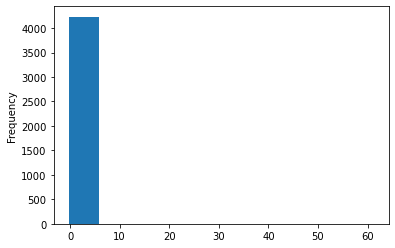

In [18]:
df.lotsizearea.plot.hist()

<AxesSubplot:>

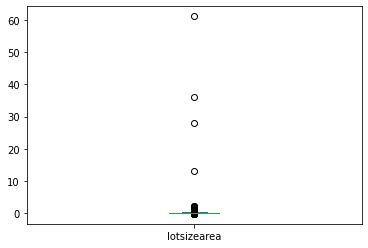

In [19]:
df.lotsizearea.plot.box()

With such a highly skewed, distribution, the median seems like the best representative value, so we will impute the median for this feature. 

#### lotfeatures

In [20]:
df.lotfeatures.isna().mean()

0.7204251386321626

In [21]:
df.lotfeatures.nunique()

143

With no reasonable way to impute values for this feature, and with such a high percentage of nulls, we will drop this column altogether. 

#### garageyn

In [22]:
df[df.garageyn.isna()].parkingfeatures.value_counts()

None/Not Applicable    30
Attached                3
Oversized               1
Name: parkingfeatures, dtype: int64

In [23]:
df[df.parkingfeatures.isin(['Attached', 'Oversized'])].garageyn.value_counts()

1.0    21
Name: garageyn, dtype: int64

I will make the assumption that a value of "None/Not Applicable" in the parkingfeatures column means there is no garage, and that "Attached" or "Oversized" are words used to describe a garage. Therefore, we will impute a 1 or 0 in the garageyn column based on these assumptions.

In [24]:
# imputing 1 in garageyn where parkingfeatures is 'Attached' or 'Oversized'
df['garageyn'] = np.where(df.parkingfeatures.isin(['Attached', 'Oversized']) & df.garageyn.isna(), 1, df.garageyn)
# imputing 0 in garageyn where parkingfeatures is 'None/Not Applicable'
df['garageyn'] = np.where((df.parkingfeatures == 'None/Not Applicable') & df.garageyn.isna(), 0, df.garageyn)             

#### totalactualrent

In [25]:
df[['propertytype', 'totalactualrent']]

,propertytype,totalactualrent
0,Residential,NaN
1,Residential Rental,2850.0
2,Residential,NaN
3,Residential,NaN
4,Residential,NaN
...,...,...
4774,Residential Rental,2295.0
4775,Residential,NaN
4776,Residential,NaN
4777,Residential,NaN


In [26]:
pd.crosstab(df.propertytype, df.totalactualrent.isna())

totalactualrent,False,True
propertytype,,
Residential,0,3592
Residential Income,0,3
Residential Rental,733,0


With the "Residential Rental" propertytype category causing such a large number of null values for the totalactualrent feature, and with rent values being incomparable to purchase price values, we will likely need to create separate models for the "Residential" and "Residential Rental" categories. 

In [27]:
df.totalactualrent.isna().mean()

0.830637707948244

In [28]:
rentals = df[df.propertytype == 'Residential Rental']
(rentals.originallistprice == rentals.totalactualrent).mean()

0.713506139154161

In most cases, the `originallistprice` matches the `totalactualrent` column. There's little reason to believe that the `totalactualrent` feature will provide much additional predictive value, and it is not applicable to the for-sale listings, so we will drop this column altogether. 

#### stories

In [29]:
df.stories.isna().sum(), df.stories.isna().mean()

(740, 0.1709796672828096)

In [30]:
df.stories.value_counts(normalize=True)

2.0    0.507804
1.0    0.489409
3.0    0.002787
Name: stories, dtype: float64

At this point, we might decide to drop the `stories` column altogether, given it's large percentage of null values. However, it would be a reasonable hypothesis that stories could be a predictor of whether a property is new construction (anecdotally, new builds in my area are much more likely to be multi-story than are older homes). These values might be imputed using information in the `architecturalstyle` column. This will be investigated further after we've removed values from `architecturalstyle`.

#### handling nulls (for simplicity's sake, we'll drop null rows in the remaining columns where the total number of nulls is 10 or less). 

In [31]:
df.isna().sum()

address_id                  0
listingcontractdate         0
originallistprice          15
propertytype                0
propertysubtype             1
lotsizearea                92
lotfeatures              3118
totalactualrent          3595
bedroomstotal               3
bathroomstotalinteger       3
bathroomsfull               3
bathroomshalf               3
livingarea                  9
garageyn                    3
parkingfeatures             3
stories                   740
yearbuilt                   1
newconstructionyn           0
heating                     0
cooling                     0
architecturalstyle          7
dtype: int64

In [32]:
cols_to_drop_rows = [col for col in df.columns if (df[col].isna().sum() > 0) 
                                                & (df[col].isna().sum() <=10)
                    ]
cols_to_drop_rows.append('originallistprice')
cols_to_drop = ['lotfeatures', 'totalactualrent'] 
cols_to_impute_median = ['lotsizearea']

In [33]:
# dropping columns
df = df.drop(columns=cols_to_drop)

# imputing median
for col in cols_to_impute_median:
    df[col] = np.where(df[col].isna(), df[col].median(), df[col])

# dropping rows
for col in cols_to_drop_rows:
    df = df[df[col].notnull()]

In [34]:
df.isna().sum()

address_id                 0
listingcontractdate        0
originallistprice          0
propertytype               0
propertysubtype            0
lotsizearea                0
bedroomstotal              0
bathroomstotalinteger      0
bathroomsfull              0
bathroomshalf              0
livingarea                 0
garageyn                   0
parkingfeatures            0
stories                  724
yearbuilt                  0
newconstructionyn          0
heating                    0
cooling                    0
architecturalstyle         0
dtype: int64

#### `stories` continued

In [35]:
df.architecturalstyle.value_counts()

Two Story                                                1527
One Story                                                1405
One Story,Traditional                                     420
Two Story,Traditional                                     419
One Story,Contemporary                                    187
Two Story,Contemporary                                    125
Traditional                                                29
One Story,Ranch                                            21
Two Story,Contemporary,Traditional                         18
Traditional,Two Story                                      14
One Story,Ranch,Traditional                                12
Two Story,Texas Hill Country                               12
3 or More                                                  10
One Story,Texas Hill Country                               10
One Story,Contemporary,Traditional                          8
One Story,Contemporary,Ranch                                8
Two Stor

In [36]:
# create a new column which bases number of stories on "architecturalstyle" info

def get_stories_to_fillna(archstyle):
    if 'One Story' in archstyle:
        return 1
    elif 'Two Story' in archstyle:
        return 2
    elif '3 or More' in archstyle:
        return 3
    else:
        return np.nan
    
df['stories_to_fillna'] = df.architecturalstyle.apply(get_stories_to_fillna)
df[['stories', 'stories_to_fillna']]

,stories,stories_to_fillna
0,1.0,1.0
1,NaN,2.0
2,1.0,1.0
3,1.0,1.0
4,2.0,NaN
...,...,...
4774,NaN,2.0
4775,1.0,1.0
4776,1.0,1.0
4777,2.0,2.0


In [37]:
df['stories'] = df.stories.fillna(df.stories_to_fillna)
df[['stories', 'stories_to_fillna']]

,stories,stories_to_fillna
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,2.0,NaN
...,...,...
4774,2.0,2.0
4775,1.0,1.0
4776,1.0,1.0
4777,2.0,2.0


In [38]:
df = df.drop(columns=['stories_to_fillna'])

In [39]:
df.stories.isna().sum()

6

In [40]:
# dropping rows where "stories" is null
df = df[df.stories.notnull()]

In [41]:
df.stories.isna().sum()

0

### Adjusting data types

In [42]:
# address_id from int to string
df['address_id'] = df.address_id.astype(str)

# garageyn and newconstructionyn to from float to boolean
df['newconstructionyn'] = df.newconstructionyn.astype(bool)
df['garageyn'] = df.garageyn.astype(bool)

# listingcontractdate from string to pandas datetime
df['listingcontractdate'] = pd.to_datetime(df.listingcontractdate)

### Data Cleaning

#### lotsizearea

During exploration, it was uncovered that there are values for `lotsizearea` which are less than 0, which obviously does not represent the real-world lot size. 

In [43]:
df.lotsizearea.value_counts().sort_index()

-0.250      43
-0.160      20
 0.010       3
 0.020       3
 0.029       1
 0.050       1
 0.059       5
 0.070      12
 0.080       8
 0.089      12
 0.100     195
 0.110     515
 0.119     744
 0.130     417
 0.140     562
 0.149     437
 0.160     278
 0.170     264
 0.179     152
 0.190     135
 0.200     110
 0.209      66
 0.220      48
 0.230      51
 0.239      33
 0.250      31
 0.260      22
 0.270      15
 0.280      10
 0.289      14
 0.299      14
 0.309      11
 0.320       7
 0.330       4
 0.340       9
 0.349       4
 0.359       1
 0.369       4
 0.380       1
 0.390       1
 0.419       1
 0.440       1
 0.460       2
 0.469       2
 0.489       1
 0.500       1
 0.510       2
 0.550       1
 0.729       1
 0.910       1
 1.030       1
 1.100       1
 1.360       1
 1.620       1
 1.770       2
 1.979       1
 2.080       1
 2.279       1
 13.000      1
 28.000      1
 36.000      1
 61.149      1
Name: lotsizearea, dtype: int64

Since .25 and .16 are common values for `lotsizearea`, and a negative lot size is obviously impossible, I will assume that these negative values represent data errors and should be converted to positive values. However, exploration also discovered that only new construction properties had such errors. Perhaps there is some reason that new construction is being listed with a negative lot size, and this could then be a useful predictor. I will therefore maintain this information by creating a boolean column for whether the property was listed as negative, then correct the error by taking the absolute value of `lotsizearea`.

In [44]:
# creating a boolean column for whether a property was listed with a negative value for lot size
# this is likely an error, but could still be useful info, since only new construction was listed with negative values
df['lotsizearea_listed_negative'] = (df.lotsizearea < 0)

# correcting the error by taking the absolute value of the lot size
df['lotsizearea'] = df.lotsizearea.abs()

### Feature Engineering

#### propertysubtype

In [45]:
pd.DataFrame(df.propertysubtype.unique())

,0
0,Single Family Detached
1,Single Family Residence Detached
2,Duplex
3,Townhouse
4,1st Seller Financing
5,Condominium
6,Manufactured Home


It seems that "Single Family Detached" and "Single Family Residence Detached" are likely to have the same meaning, so let's combine them to one value 

In [46]:
# combing "Single Family Detached" and "Single Family Residence Detached" into one value: "Single Family Detached"
df['propertysubtype'] = np.where(df.propertysubtype == 'Single Family Residence Detached', 
                                'Single Family Detached', df.propertysubtype)

#### Listing date features

In [47]:
# quarter of listing
df['listing_quarter'] = df.listingcontractdate.dt.quarter

# month of listing
df['listing_month'] = df.listingcontractdate.dt.month

# date of listing
df['listing_dayofmonth'] = df.listingcontractdate.dt.day

# day of week of listing
df['listing_dayofweek'] = df.listingcontractdate.apply(lambda x: x.strftime('%a'))
df['listing_dayofweek'] = pd.Categorical(df.listing_dayofweek,
                                          categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                                          ordered=True)

# listed on the weekend
df['listed_on_weekend'] = np.where(df.listing_dayofweek.isin(['5-Sat', '6-Sun']), True, False)

In [48]:
df[['listing_quarter', 
     'listing_month', 
     'listing_dayofmonth', 
     'listing_dayofweek', 
     'listed_on_weekend']].head()

,listing_quarter,listing_month,listing_dayofmonth,listing_dayofweek,listed_on_weekend
0,4,12,9,Thu,False
1,3,7,1,Fri,False
2,4,12,29,Wed,False
3,4,12,9,Thu,False
4,3,7,20,Tue,False


#### Build Year Features

In [49]:
# years since build year
df['years_since_build'] = df.listingcontractdate.apply(lambda x: x.year) - df.yearbuilt

# built within two calendar years of listing (i.e. this year or last)
df['built_last_two_years'] = df.years_since_build <= 1

#### Price per SqFt

In [50]:
# price per SqFt
df['originallistprice_persqft'] = round(df.originallistprice / df.livingarea, 0)

In [51]:
df[['originallistprice', 'originallistprice_persqft']]

,originallistprice,originallistprice_persqft
0,279900.0,197.0
1,2850.0,1.0
2,249900.0,155.0
3,310000.0,179.0
4,268000.0,118.0
...,...,...
4774,2295.0,1.0
4775,483867.0,246.0
4776,458270.0,233.0
4777,555992.0,209.0


#### Parking Features

In [52]:
for feat in df.parkingfeatures.unique():
    print(feat)

Two Car Garage
Two Car Garage,Attached
One Car Garage
Three Car Garage,Attached
Converted Garage
One Car Garage,Attached
Three Car Garage,Attached,Oversized
Three Car Garage
One Car Garage,Detached,Rear Entry
Two Car Garage,Detached
None/Not Applicable
One Car Garage,Detached
One Car Garage,Oversized
Attached
One Car Garage,Attached,Oversized
Two Car Garage,Converted Garage
Converted Garage,None/Not Applicable
Three Car Garage,Tandem
Two Car Garage,Side Entry,Attached
Side Entry,Attached
Two Car Garage,Oversized
Two Car Garage,Attached,Oversized
Two Car Garage,Attached,Rear Entry,Oversized
One Car Garage,Rear Entry
One Car Garage,Attached,Rear Entry
One Car Garage,Converted Garage
Two Car Garage,Attached,Side Entry,Oversized
Two Car Garage,Attached,Converted Garage
One Car Garage,Attached,None/Not Applicable
Attached,Converted Garage
Three Car Garage,Attached,Tandem
Two Car Garage,Golf Cart,Oversized
Two Car Garage,Attached,Golf Cart,Oversized
One Car Garage,Attached,Converted Garage
T

In [53]:
# numerical column for size of garage

def get_garage_size(parkingfeatures):
    if 'None' in parkingfeatures:
        return 0
    if 'One Car' in parkingfeatures:
        return 1
    elif 'Two Car' in parkingfeatures:
        return 2
    elif 'Three Car' in parkingfeatures:
        return 3
    elif 'Four or More' in parkingfeatures:
        return 4
    # 2-car garages are by far the most common in the dataset, so we will impute 2 when 
    # garage size is unknown
    else:
        return 2

df['garage_size'] = df.parkingfeatures.apply(get_garage_size)

# boolean columns for each listed parking feature
df['parkingfeatures_attached'] = df.parkingfeatures.str.contains('Attached')
df['parkingfeatures_detached'] = df.parkingfeatures.str.contains('Detached')
df['parkingfeatures_oversized'] = df.parkingfeatures.str.contains('Oversized')
df['parkingfeatures_converted'] = df.parkingfeatures.str.contains('Converted')
df['parkingfeatures_sideentry'] = df.parkingfeatures.str.contains('Side Entry')
df['parkingfeatures_rearentry'] = df.parkingfeatures.str.contains('Rear Entry')
df['parkingfeatures_tandem'] = df.parkingfeatures.str.contains('Tandem')
df['parkingfeatures_golfcart'] = df.parkingfeatures.str.contains('Golf Cart')

# drop original parkingfeatures column
df = df.drop(columns=['parkingfeatures'])

In [54]:
parking_features = ['garage_size',
                    'parkingfeatures_attached',
                    'parkingfeatures_detached',
                    'parkingfeatures_oversized', 
                    'parkingfeatures_converted', 
                    'parkingfeatures_sideentry', 
                    'parkingfeatures_rearentry', 
                    'parkingfeatures_tandem', 
                    'parkingfeatures_golfcart']
df[parking_features].head()

,garage_size,parkingfeatures_attached,parkingfeatures_detached,parkingfeatures_oversized,parkingfeatures_converted,parkingfeatures_sideentry,parkingfeatures_rearentry,parkingfeatures_tandem,parkingfeatures_golfcart
0,2,False,False,False,False,False,False,False,False
1,2,True,False,False,False,False,False,False,False
2,2,True,False,False,False,False,False,False,False
3,2,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,False,False,False


In [55]:
pd.crosstab(df.parkingfeatures_attached, df.parkingfeatures_detached)

parkingfeatures_detached,False,True
parkingfeatures_attached,,
False,2774,21
True,1494,0


#### Heating Features

In [56]:
df.heating.unique()

array(['Central,Natural Gas', 'Central,Electric',
       'Central,2 Units,Natural Gas', 'Central,Heat Pump,Electric',
       'Central,1 Unit,Natural Gas', 'Heat Pump,1 Unit,Electric',
       'Central,2 Units,Electric', 'Heat Pump,Electric',
       'Central,Heat Pump,Zoned,1 Unit,Electric',
       'Central,1 Unit,Electric', 'Central,Other',
       'Central,Heat Pump,1 Unit,Electric',
       'Central,Electric,Natural Gas', 'Heat Pump,Natural Gas',
       'Central,Floor Furnace,Natural Gas', '1 Unit,Natural Gas',
       '2 Units,Electric', 'Central,Heat Pump,Natural Gas,Solar',
       'Central,Zoned,Natural Gas', 'Other',
       'Central,2 Units,Propane Owned',
       'Central,Heat Pump,Zoned,Electric',
       'Central,1 Unit,Electric,Propane Owned',
       'Central,Zoned,1 Unit,Natural Gas',
       'Central,Electric,Natural Gas,Solar',
       'Central,2 Units,Electric,Natural Gas', 'Central,Electric,Solar',
       'Central,Heat Pump,Natural Gas',
       'Central,Heat Pump,2 Units,Natural

In [57]:
# create boolean columns for each listed heating feature

def get_unique_heating_features(df):
    '''
    takes in the original "heating" feature that lists multiple attributes in one column,
    separates the individual attributes and returns a list of unique attributes
    '''
    heating_features = ''
    for feature in df.heating.unique():
        heating_features += (feature + ',')
    heating_features = heating_features.split(sep=',')
    heating_features = pd.Series(heating_features).unique()
    heating_features = heating_features[heating_features != '']
    return heating_features

# apply the function above for each unique attribute to create the new boolean features
for feature in get_unique_heating_features(df):
    df[f'heating_{feature.lower().replace(" ", "")}'] = df.heating.str.contains(feature)

In [58]:
df[[f'heating_{feature.lower().replace(" ", "")}' for feature in get_unique_heating_features(df)]].head()

,heating_central,heating_naturalgas,heating_electric,heating_2units,heating_heatpump,heating_1unit,heating_zoned,heating_other,heating_floorfurnace,heating_solar,heating_propaneowned,heating_none,heating_windowunit
0,True,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,False,False,False


In [59]:
# drop original "heating" column
df = df.drop(columns=['heating'])

#### Architectural Style Features

In [60]:
df.architecturalstyle.value_counts()

Two Story                                                1527
One Story                                                1405
One Story,Traditional                                     420
Two Story,Traditional                                     419
One Story,Contemporary                                    187
Two Story,Contemporary                                    125
Traditional                                                26
One Story,Ranch                                            21
Two Story,Contemporary,Traditional                         18
Traditional,Two Story                                      14
One Story,Ranch,Traditional                                12
Two Story,Texas Hill Country                               12
3 or More                                                  10
One Story,Texas Hill Country                               10
One Story,Contemporary,Traditional                          8
One Story,Contemporary,Ranch                                8
Two Stor

In [61]:
# creating a boolean column for each of the listed architectural style features

# a one-time-use function
def get_unique_archstyle_features(df):
    '''
    takes in the original "architecturalstyle" column that lists multiple attributes in one column, 
    separates the individual attributes and returns a list of unique attributes
    '''
    archstyle_features = ''
    for feature in df.architecturalstyle.unique():
        archstyle_features += (feature + ',')
    archstyle_features = archstyle_features.split(sep=',')
    archstyle_features = pd.Series(archstyle_features).unique()
    archstyle_features = archstyle_features[archstyle_features != '']
    return archstyle_features

# for each unique attribute, create a boolean column indicating whether the 
# # architectural style column contains that attribute
for feature in get_unique_archstyle_features(df):
    df[f'archstyle_{feature.lower().replace(" ", "")}'] = df.architecturalstyle.str.contains(feature)

In [62]:
df[[f'archstyle_{feature.lower().replace(" ", "")}' for feature in get_unique_archstyle_features(df)]].head()

,archstyle_onestory,archstyle_twostory,archstyle_traditional,archstyle_contemporary,archstyle_splitlevel,archstyle_ranch,archstyle_texashillcountry,archstyle_craftsman,archstyle_other,archstyle_colonial,archstyle_spanish,archstyle_manufacturedhome-singlewide,archstyle_3ormore,archstyle_a-frame
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [63]:
# drop the original architecturalstyle column
# as well as the new columns that contain info about number of stories (redundant from "stories" column)
cols = ['architecturalstyle', 'archstyle_onestory', 'archstyle_twostory', 'archstyle_3ormore']
df = df.drop(columns=cols)

#### Cooling Features

In [64]:
df.cooling.value_counts()

One Central                              3903
Two Central                               252
One Central,Zoned                          51
One Central,Heat Pump                      34
One Central,One Window/Wall                15
Two Central,Zoned                          10
Zoned                                       8
One Central,Two Central                     4
One Central,Heat Pump,Zoned                 3
One Central,Other                           2
Three+ Central                              2
One Central,3+ Window/Wall                  1
One Central,Three+ Central                  1
Two Central,One Window/Wall                 1
Not Applicable                              1
One Central,One Window/Wall,Heat Pump       1
Name: cooling, dtype: int64

In [65]:
# create boolean columns for cooling features
df['cooling_central'] = df.cooling.str.contains('Central')
df['cooling_windowwall'] = df.cooling.str.contains('Window/Wall')
df['cooling_heatpump'] = df.cooling.str.contains('Heat Pump')
df['cooling_zoned'] = df.cooling.str.contains('Zoned')

# create numerical columns for numbers of Central and Window/Wall cooling units

# a one-time-use function
def get_central_cooling_units(cooling_features):
    '''
    takes in the original "cooling" feature which lists several attributes in one column
    returns a number representing how many central cooling units are listed
    '''
    if 'Three+ Central' in cooling_features:
        return 3
    elif 'Two Central' in cooling_features:
        return 2
    elif 'One Central' in cooling_features:
        return 1
    elif 'Not Applicable' in cooling_features:
        return 0
    # 'One Central' is by far the most common value, 
    # so we will impute a 1 where data is unavailable
    else:
        return 1

# apply the function above to the "cooling" column to create the new feature
df['central_cooling_units'] = df.cooling.apply(get_central_cooling_units)

# a one-time-use function
def get_windowwall_units(cooling_features):
    '''
    takes in the original "cooling" feature which lists several attributes in one column
    returns a number representing how many window/wall cooling units are listed
    '''
    if '3+ Window/Wall' in cooling_features:
        return 3
    elif 'Two Window/Wall' in cooling_features:
        return 2
    elif 'One Window/Wall' in cooling_features:
        return 1
    # the vast majority of properties do not have window/wall units,
    # so we will impute 0 where data is unavailable
    else:
        return 0

# apply the function above to create the new feature
df['windowwall_cooling_units'] = df.cooling.apply(get_windowwall_units)

In [66]:
df[['cooling', 'central_cooling_units', 'windowwall_cooling_units']].sample(20)

,cooling,central_cooling_units,windowwall_cooling_units
741,One Central,1,0
3100,One Central,1,0
3246,One Central,1,0
737,Two Central,2,0
2010,One Central,1,0
4365,One Central,1,0
3471,One Central,1,0
3057,One Central,1,0
4483,One Central,1,0
965,One Central,1,0


In [67]:
df[['cooling', 'central_cooling_units', 'windowwall_cooling_units']][df.cooling.str.contains('Window')]

,cooling,central_cooling_units,windowwall_cooling_units
52,"One Central,One Window/Wall",1,1
57,"One Central,One Window/Wall",1,1
91,"One Central,One Window/Wall",1,1
594,"One Central,One Window/Wall",1,1
805,"One Central,3+ Window/Wall",1,3
1358,"One Central,One Window/Wall",1,1
1451,"One Central,One Window/Wall",1,1
1458,"Two Central,One Window/Wall",2,1
1725,"One Central,One Window/Wall",1,1
2245,"One Central,One Window/Wall,Heat Pump",1,1


In [68]:
# drop the original "cooling" column
df = df.drop(columns=['cooling'])

#### Lot Size features

In [69]:
# create a boolean column for whether the lot size is 0.2 or less
df['lotsizearea_small'] = df.lotsizearea <= 0.2

### Separating rentals vs traditional for-sale listings

Since the `originallistprice` represents the monthly rent amount (with values all less than $4,000) for rental listings and the sale price (with typical values in the hundreds of thousands) for other listings, these will not be comparable without some transformation. For purposes of exploring price features, we will create two additional dataframes which represent for-sale and for-rent listings separately. 

sale_df: traditional for-sale listings

rent_df: rental listings

In [70]:
rent_df = df[df.propertytype == 'Residential Rental']
sale_df = df[df.propertytype == 'Residential']

In [71]:
# confirming that no data was lost in this split
sale_df.shape[0] + rent_df.shape[0] == df.shape[0]

True

In [72]:
# drop irrelevant columns
sale_df = sale_df.drop(columns=['propertytype'])
rent_df = rent_df.drop(columns=['propertytype'])

### creating scaled price columns

In [73]:
sale_df.originallistprice.min(), sale_df.originallistprice.max()

(33500.0, 1200000.0)

In [74]:
rent_df.originallistprice.min(), rent_df.originallistprice.max()

(1.0, 3950.0)

<AxesSubplot:xlabel='originallistprice_persqft_scaled', ylabel='Count'>

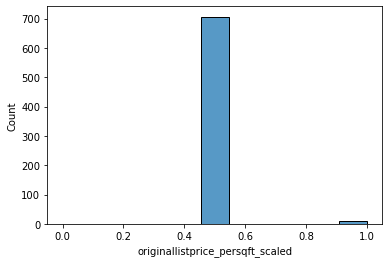

In [85]:
sns.histplot(rent_df.originallistprice_persqft_scaled)

<AxesSubplot:xlabel='originallistprice', ylabel='Count'>

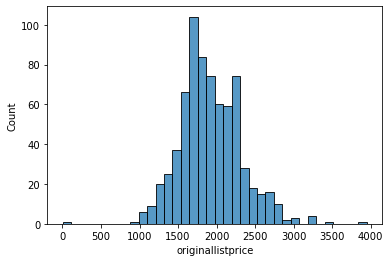

In [81]:
sns.histplot(rent_df.originallistprice)

<AxesSubplot:xlabel='livingarea', ylabel='Count'>

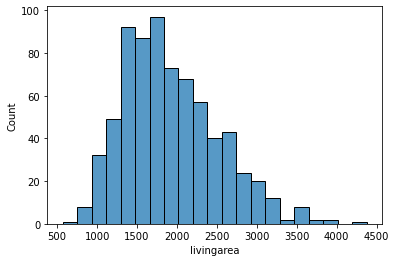

In [82]:
sns.histplot(rent_df.livingarea)

In [75]:
# scale each category to a value between 0 and 1 based on the category's respective min and max values

scaler = MinMaxScaler()

sale_df['originallistprice_scaled'] = scaler.fit_transform(sale_df[['originallistprice']])
rent_df['originallistprice_scaled'] = scaler.fit_transform(rent_df[['originallistprice']])

sale_df['originallistprice_persqft_scaled'] = scaler.fit_transform(sale_df[['originallistprice_persqft']])
rent_df['originallistprice_persqft_scaled'] = scaler.fit_transform(rent_df[['originallistprice_persqft']])

In [76]:
# combine the sale and rental scaled price columns into one df
df2 = pd.concat([sale_df[['originallistprice_scaled', 'originallistprice_persqft_scaled']],
                 rent_df[['originallistprice_scaled', 'originallistprice_persqft_scaled']]
                ]).sort_index()
df2

,originallistprice_scaled,originallistprice_persqft_scaled
0,0.211230,0.530259
1,0.721448,0.500000
2,0.185512,0.409222
3,0.237034,0.478386
4,0.201029,0.302594
...,...,...
4774,0.580907,0.500000
4775,0.386084,0.671470
4776,0.364141,0.634006
4777,0.447914,0.564841


In [77]:
# join them back to the original df
df = pd.merge(df, df2, 
              how='left', 
              left_index=True, 
              right_index=True)
df

,address_id,listingcontractdate,originallistprice,propertytype,propertysubtype,lotsizearea,bedroomstotal,bathroomstotalinteger,bathroomsfull,bathroomshalf,livingarea,garageyn,stories,yearbuilt,newconstructionyn,lotsizearea_listed_negative,listing_quarter,listing_month,listing_dayofmonth,listing_dayofweek,listed_on_weekend,years_since_build,built_last_two_years,originallistprice_persqft,garage_size,parkingfeatures_attached,parkingfeatures_detached,parkingfeatures_oversized,parkingfeatures_converted,parkingfeatures_sideentry,parkingfeatures_rearentry,parkingfeatures_tandem,parkingfeatures_golfcart,heating_central,heating_naturalgas,heating_electric,heating_2units,heating_heatpump,heating_1unit,heating_zoned,heating_other,heating_floorfurnace,heating_solar,heating_propaneowned,heating_none,heating_windowunit,archstyle_traditional,archstyle_contemporary,archstyle_splitlevel,archstyle_ranch,archstyle_texashillcountry,archstyle_craftsman,archstyle_other,archstyle_colonial,archstyle_spanish,archstyle_manufacturedhome-singlewide,archstyle_a-frame,cooling_central,cooling_windowwall,cooling_heatpump,cooling_zoned,central_cooling_units,windowwall_cooling_units,lotsizearea_small,originallistprice_scaled,originallistprice_persqft_scaled
0,3529,2021-12-09,279900.0,Residential,Single Family Detached,0.140,3.0,2.0,2.0,0.0,1418.0,True,1.0,2007.0,False,False,4,12,9,Thu,False,14.0,False,197.0,2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.211230,0.530259
1,106247,2022-07-01,2850.0,Residential Rental,Single Family Detached,0.170,4.0,3.0,2.0,1.0,3288.0,True,2.0,1997.0,False,False,3,7,1,Fri,False,25.0,False,1.0,2,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.721448,0.500000
2,217187,2021-12-29,249900.0,Residential,Single Family Detached,0.140,3.0,2.0,2.0,0.0,1614.0,True,1.0,2006.0,False,False,4,12,29,Wed,False,15.0,False,155.0,2,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.185512,0.409222
3,241534,2021-12-09,310000.0,Residential,Single Family Detached,0.119,4.0,2.0,2.0,0.0,1732.0,True,1.0,2012.0,False,False,4,12,9,Thu,False,9.0,False,179.0,2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.237034,0.478386
4,267606,2021-07-20,268000.0,Residential,Single Family Detached,0.110,4.0,3.0,2.0,1.0,2278.0,True,2.0,2006.0,False,False,3,7,20,Tue,False,15.0,False,118.0,1,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.201029,0.302594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,310173330,2022-07-01,2295.0,Residential Rental,Single Family Detached,0.160,4.0,3.0,2.0,1.0,1874.0,True,2.0,2022.0,True,False,3,7,1,Fri,False,0.0,True,1.0,2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,True,0.580907,0.500000
4775,310197538,2022-07-02,483867.0,Residential,Single Family Detached,0.119,3.0,3.0,2.0,1.0,1963.0,True,1.

In [78]:
pd.crosstab(df.newconstructionyn, df.propertytype)

propertytype,Residential,Residential Rental
newconstructionyn,,
False,2754,645
True,817,73
